In [113]:
## Intent of the model is take information about the passengers - age, gender, 
# whatever, and predict whether or not they are likly to survive the sinking of the ship!

import numpy as np 
import pandas as pd
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
#Import test set 
df = pd.read_csv('titanic_train_data.csv')

In [115]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
#View datatypes
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [117]:
#NaN values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
#Drop cabin column completely
df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare','Embarked']]

In [119]:
#NaN values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [120]:
df.shape

(891, 11)

In [121]:
df.dropna(inplace=True)

In [122]:
#Shape

df.shape

(712, 11)

In [123]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [124]:
#slice the data set in feature variables and target variables 


#Drop Cabin - too many nulls - beware age has a few nulls
X = df[[ 'Age', 'SibSp']]

y = df['Survived']




In [125]:
#print and shape the data
print(X[:5])
print(X.shape)
print(y[:5])
print(y.shape)

    Age  SibSp
0  22.0      1
1  38.0      1
2  26.0      0
3  35.0      1
4  35.0      0
(712, 2)
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
(712,)


c:\Users\jmken\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

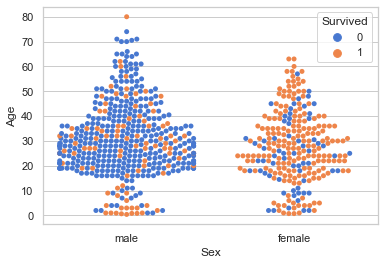

In [133]:
sns.set(style = 'whitegrid', palette = 'muted')#customize

sns.swarmplot(x=df.Sex, y = df.Age, hue=df.Survived)

c:\Users\jmken\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

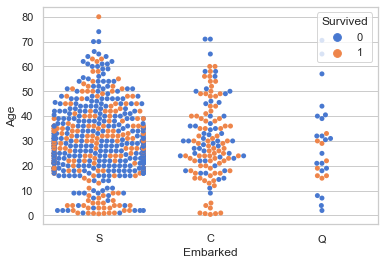

In [136]:
sns.swarmplot(x=df.Embarked, y = df.Age, hue=df.Survived)

c:\Users\jmken\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jmken\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Age'>

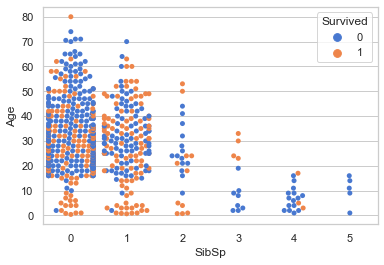

In [137]:
sns.swarmplot(x=df.SibSp, y = df.Age, hue=df.Survived)

c:\Users\jmken\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jmken\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

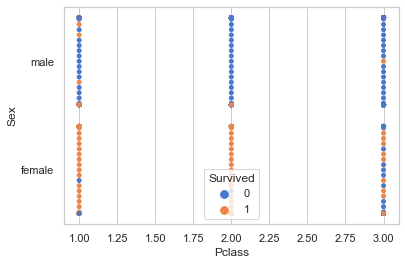

In [139]:
sns.swarmplot(x=df.Pclass, y = df.Sex, hue=df.Survived)

##I think it looks like Sex, and Pclass are two important feature variables

In [ ]:
#Perform split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
#feature scaling
st_X = StandardScaler()
X_train = st_X.fit_transform(X_train)
X_test = st_X.transform(X_test)

In [ ]:
#Fit model 
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)